In [0]:
!pip install --no-deps hyperas

In [2]:
from google.colab import drive
drive.mount("/content/drive",force_remount=True)
# import sys
# sys.path.append('/content/drive/My Drive/Colab Notebooks')
from google.colab import files
src = list(files.upload().values())[0]
open('globalVars.py','wb').write(src)
import globalVars

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Saving globalVars.py to globalVars.py


In [0]:
import tensorflow as tf
#import tensorflow.keras as keras
tf.__version__

'2.2.0-rc3'

In [0]:
from timeit import default_timer as timer

In [4]:

import numpy as np
from hyperopt import Trials, STATUS_OK, tpe
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.models import Sequential
#from tensorflow.keras.utils import np_utils
from hyperas import optim
from hyperas.distributions import choice, uniform
import globalVars

Using TensorFlow backend.


In [0]:


from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from statistics import mean
import random

globalVars.top_words = 5000
(globalVars.x_train, globalVars.y_train), (globalVars.x_test, globalVars.y_test) = imdb.load_data(num_words=globalVars.top_words)


In [6]:
globalVars.x_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 2, 19, 178, 32]),
       list([1, 194, 1153, 194, 2, 78, 228, 5, 6, 1463, 4369,

In [0]:
def data():
  return globalVars.x_train,globalVars.y_train

In [0]:
def create_model(data_array,label):

    model = Sequential()
    model.add(Embedding(5000, 50,input_length={{choice([i for i in range(1,512)])}},mask_zero=True))
    model.add(LSTM(units={{choice([_ for _ in range(1,512)])}}))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', metrics=['accuracy'],optimizer=Adam(lr= {{uniform(0.0005,0.5)}}))
    
    globalVars.padded_data = sequence.pad_sequences(globalVars.x_train, maxlen=model.layers[0].input_length,padding='post',truncating='post') 
    history = model.fit(globalVars.padded_data,globalVars.y_train, epochs = {{choice([i for i in range(1,16)])}},batch_size=100,validation_split=0.2,verbose=2)    
    acc = -history.history['val_accuracy'][-1]
    return {'loss': acc, 'status': STATUS_OK, 'model': model}


In [12]:
start = timer()
best_run, best_model = optim.minimize(model=create_model,
                                          data=data,
                                          algo=tpe.suggest,
                                          max_evals=70,
                                          trials=Trials(),
                                      notebook_name = 'drive/My Drive/Colab Notebooks/hyperSearch')

elapsed = timer()-start
print("TOOk  ",elapsed)

>>> Imports:
#coding=utf-8

try:
    from google.colab import drive
except:
    pass

try:
    from google.colab import files
except:
    pass

try:
    import globalVars
except:
    pass

try:
    import tensorflow as tf
except:
    pass

try:
    import numpy as np
except:
    pass

try:
    from hyperopt import Trials, STATUS_OK, tpe
except:
    pass

try:
    from tensorflow.keras.datasets import mnist
except:
    pass

try:
    from tensorflow.keras.layers import Dense, Dropout, Activation
except:
    pass

try:
    from tensorflow.keras.models import Sequential
except:
    pass

try:
    from hyperas import optim
except:
    pass

try:
    from hyperas.distributions import choice, uniform
except:
    pass

try:
    import globalVars
except:
    pass

try:
    from gensim.models import KeyedVectors
except:
    pass

try:
    from gensim.models import Word2Vec
except:
    pass

try:
    from tensorflow.keras.preprocessing.text import Tokenizer
except:
    pass

try:
    from tensor

In [14]:
best_model.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_24 (Embedding)     (None, 422, 50)           250000    
_________________________________________________________________
lstm_24 (LSTM)               (None, 278)               365848    
_________________________________________________________________
dropout_24 (Dropout)         (None, 278)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 279       
Total params: 616,127
Trainable params: 616,127
Non-trainable params: 0
_________________________________________________________________


In [15]:
best_model.optimizer.lr

<tf.Variable 'Adam/learning_rate:0' shape=() dtype=float32, numpy=0.0031122928>

In [16]:
best_model.layers[0].input_length

422

In [17]:
print(best_run)
#best_epochs = 20
# add 1 to each params except unifor i.e. lr.

{'epochs': 6, 'input_length': 421, 'lr': 0.003112292919473736, 'units': 277}


In [21]:
print(best_model.epochs)

AttributeError: ignored

In [0]:
## FINAL RUN on TRAIN + VAL AND TEST

In [26]:
embedding_dimension = 50
max_timesteps = 422
model = Sequential()
model.add(Embedding(globalVars.top_words, embedding_dimension, input_length=max_timesteps,mask_zero=True))
model.add(LSTM(278))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.00311), metrics=['accuracy'])
print(model.summary())
x = sequence.pad_sequences(globalVars.x_train, maxlen=422,padding='post',truncating='post')
model.fit(x, globalVars.y_train, epochs=7, batch_size=100)

Model: "sequential_74"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_73 (Embedding)     (None, 422, 50)           250000    
_________________________________________________________________
lstm_73 (LSTM)               (None, 278)               365848    
_________________________________________________________________
dropout_73 (Dropout)         (None, 278)               0         
_________________________________________________________________
dense_73 (Dense)             (None, 1)                 279       
Total params: 616,127
Trainable params: 616,127
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/7
250/250 [==============================] - 16s 63ms/step - loss: 0.5479 - accuracy: 0.7294
Epoch 2/7
250/250 [==============================] - 16s 64ms/step - loss: 0.4952 - accuracy: 0.7630
Epoch 3/7
250/250 [===================

In [0]:
x_test = sequence.pad_sequences(globalVars.x_test, maxlen=422,padding='post',truncating='post')
prediction = model.predict(x_test,batch_size=100)

[[0.21948932]
 [0.9998281 ]
 [0.25660503]]
[0 1 1]
Confusion matrix, without normalization
[[11382  1118]
 [ 2333 10167]]


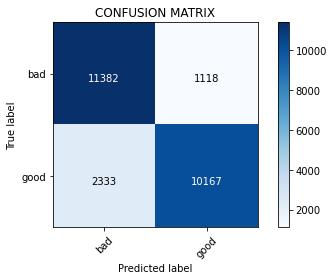

In [38]:
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",verticalalignment="top",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.savefig('hyperas-confusion-matrix.png')
print(prediction[:3])
print(globalVars.y_test[:3])
cm = confusion_matrix(globalVars.y_test,prediction.round())
plot_confusion_matrix(cm,['bad','good'],title='CONFUSION MATRIX')

Area under graph 0.9350280649069418
-------------------------------------------------
Precision for good review 0.9009304386353567
Recall for good review 0.81336
F1-score for good review  0.8549085558124869
-------------------------------------------------
Precision for bad review 0.829894276339774
Recall for bad review 0.91056
F1-score for bad review  0.8683578104138853


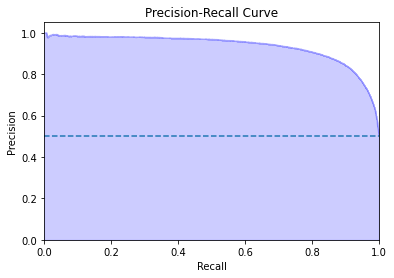

In [39]:

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import auc
import matplotlib.pyplot as plt
from funcsigs import signature
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import f1_score
from inspect import signature
import numpy as np

def call_precision_recall_curve(truelabel,predictedlabel,actualprediction,label):
    
    #print(truelabel.shape)
    #print(actualprediction.shape)
    
    precision, recall, _ = precision_recall_curve(truelabel,actualprediction)
    au = auc(recall, precision)
    print("Area under graph "+str(au))
    print("-------------------------------------------------")
    rec_score = recall_score(truelabel,predictedlabel,pos_label=1,average='binary')
    precise_score = precision_score(truelabel,predictedlabel,pos_label=1,average='binary')
    f1 = f1_score(truelabel,predictedlabel,pos_label=1, average='binary')
    print("Precision for good review "+str(precise_score))
    print("Recall for good review "+str(rec_score))
    print("F1-score for good review  " + str(f1))
    print("-------------------------------------------------")
    rec_score = recall_score(truelabel,predictedlabel,pos_label=0,average='binary')
    precise_score = precision_score(truelabel,predictedlabel,pos_label=0,average='binary')
    f1 = f1_score(truelabel,predictedlabel,pos_label=0, average='binary')
    print("Precision for bad review "+str(precise_score))
    print("Recall for bad review "+str(rec_score))
    print("F1-score for bad review  " + str(f1))
    
    
    #plot the no-skill line too
    positive_cases = sum(truelabel)/len(truelabel)
    plt.plot([0, 1], [positive_cases, positive_cases], linestyle='--')
    
    
    
    # In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
    step_kwargs = ({'step': 'post'}
                   if 'step' in signature(plt.fill_between).parameters
                   else {})
    plt.step(recall, precision, color='b', alpha=0.2,
             where='post')
    plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall Curve')
    plt.savefig('Precision-Recall-Curve-hyperas')
call_precision_recall_curve(globalVars.y_test,prediction.round(),prediction,1)

In [30]:
#!pip install funcsigs

In [0]:
#!pip install hyperas